<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> [pour Statistique et Science des Données](https://github.com/wikistat/Intro-Python)

# Apprentissage Statistique / Machine avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 180px; display: inline" alt="Scikit-Learn"/></a>
**Résumé**: Ce calepin introduit l'utilisation de la librairie `scikit-learn` pour la modélisation et l'apprentissage. Pourquoi utiliser `scikit-learn` ? Ou non ? Liste des fonctionnalités, quelques exemples de mise en oeuvre de modélisation ([régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [$k$-plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf), [arbres de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf), [forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf). Optimisation des paramètres (complexité) des modèles par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf). Fontions de chaînage (*pipeline*) de transformations et estimations. D'autres fonctionalités de `Scikit-learn` sont abordées dans les calepins du [dépot sur l'apprentissage](https://github.com/wikistat/Apprentissage) statistique. 

# <FONT COLOR="Red">Première partie: Exploration</font>

### 1. Données "Magasins"

In [78]:
# Lire les données d'apprentissage
import pandas as pd
path='/home/odemoly/Documents/Certificat_BD/Second_Projet/2 - public_dat/'  # si les données sont déjà dans le répertoire courant
# path='http://www.math.univ-toulouse.fr/~besse/Wikistat/data/'
input_string_train = path + 'store_train.data'
#df_train = pd.DataFrame([x.split(' ') for x in input_string_train.split('\n')],columns=["ID","Day","Date","Number_of_Customers","Open","Promo","State_Holiday","School_Holiday"],
                  #dtype=int)
                  #{"ID":int,"Day":int,"Date":object,"Number_of_Customers":int,"Open":int,"Promo":int,"State_Holiday":int,"School_Holiday":int})
df_train = pd.read_csv(input_string_train ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])

# Lire les données de test
input_string_test = path + 'store_test.data'
df_test = pd.read_csv(input_string_test ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])



##### solutions
input_string_sol = path + 'store_train.solution'
df_sol = pd.read_csv(input_string_sol ,sep=" ",header=None, names = ["Sales"])


df_full_train=pd.concat([df_train,df_sol],axis=1)

df_train = df_full_train
df_train.dtypes

ID                      int64
Day                     int64
Date                   object
Number_of_Customers     int64
Open                    int64
Promo                   int64
State_Holiday          object
School_Holiday          int64
Sales                   int64
dtype: object

In [79]:
# Redéfinir les types 
df_train["ID"]=pd.DataFrame(df_train["ID"], dtype=int)
#df_train["Day"]=pd.DataFrame(df_train["Day"],dtype=int)
df_train["Day"]=pd.Categorical(df_train["Day"],ordered=True)
df_train["Date"]=pd.DataFrame(df_train["Date"],dtype="datetime64[ns]")
df_train["Open"]=pd.DataFrame(df_train["Open"],dtype=bool)
df_train["Promo"]=pd.DataFrame(df_train["Promo"],dtype=bool)
df_train["State_Holiday"]=pd.Categorical(df_train["State_Holiday"], ordered=False)
df_train["School_Holiday"]=pd.DataFrame(df_train["School_Holiday"],dtype=bool)
df_train["Number_of_Customers"]=pd.DataFrame(df_train["Number_of_Customers"],dtype=int)
df_train["Sales"]=pd.DataFrame(df_train["Sales"],dtype=int)
df_train['Month'] = df_train['Date'].map(lambda d: d.month)
df_train["Month"]=pd.DataFrame(df_train["Month"],dtype=int)


# Redéfinir les types 
df_test["ID"]=pd.DataFrame(df_test["ID"],dtype=int)
df_test["Day"]=pd.DataFrame(df_test["Day"],dtype=int)
df_test["Date"]=pd.DataFrame(df_test["Date"],dtype="datetime64[ns]")
df_test["Open"]=pd.DataFrame(df_test["Open"],dtype=bool)
df_test["Promo"]=pd.DataFrame(df_test["Promo"],dtype=bool)
df_test["State_Holiday"]=pd.Categorical(df_test["State_Holiday"],ordered=False)
df_test["School_Holiday"]=pd.DataFrame(df_test["School_Holiday"],dtype=bool)
df_test["Number_of_Customers"]=pd.DataFrame(df_test["Number_of_Customers"],dtype=int)
df_test['Month'] = df_test['Date'].map(lambda d: d.month)
df_test["Month"]=pd.DataFrame(df_test["Month"],dtype=int)
df_test.dtypes

ID                              int64
Day                             int64
Date                   datetime64[ns]
Number_of_Customers             int64
Open                             bool
Promo                            bool
State_Holiday                category
School_Holiday                   bool
Month                           int64
dtype: object

In [80]:
# imputation des valeurs manquantes
#df["Age"]=df["Age"].fillna(df["Age"].median())
#df.Port=df["Port"].fillna("S")
df_train["State_Holiday"] = df_train["State_Holiday"].fillna("0")
df_train["School_Holiday"] = df_train["School_Holiday"].fillna(False)
df_train["Open"] = df_train["Open"].fillna(False)
df_train["Promo"] = df_train["Promo"].fillna(False)
df_train["Number_of_Customers"] = df_train["Number_of_Customers"].fillna("0")
#df_train["Day"] = df_train["Day"].fillna("1")
#df_train["ID"] = df_train["ID"].replace(to_replace="",value='0')

df_test["State_Holiday"] = df_test["State_Holiday"].fillna("0")
df_test["School_Holiday"] = df_test["School_Holiday"].fillna(False)
df_test["Open"] = df_test["Open"].fillna(False)
df_test["Promo"] = df_test["Promo"].fillna(False)
df_test["Number_of_Customers"] = df_test["Number_of_Customers"].fillna("0")
#df_test["Day"] = df_test["Day"].fillna("1")
#df_test["ID"] = df_test["ID"].replace(to_replace="",value='0')

In [81]:
# Discrétiser les variables quantitatives
#df["AgeQ"]=pd.qcut(df.Age,3,labels=["Ag1","Ag2","Ag3"])
#df["PrixQ"]=pd.qcut(df.Prix,3,labels=["Pr1","Pr2","Pr3"])
# redéfinir les noms des modalités 
#df_train["Open"]=df_train["Open"].cat.rename_categories(["Onon","Ooui"])
#df_train["Promo"]=df_train["Promo"].cat.rename_categories(["Pnon","Poui"])
df_train["State_Holiday"]=df_train["State_Holiday"].cat.rename_categories(["StateHnon","StateHc","StateHa","StateHb"])
df_train["Day"]=df_train["Day"].cat.rename_categories(["D1","D2","D3","D4","D5","D6","D7"])

#df_train["School_Holiday"]=df_train["School_Holiday"].cat.rename_categories(["SchoolHnon","SchoolHoui"])
#df_train.head()

# redéfinir les noms des modalités 
#df_test["Open"]=df_test["Open"].cat.rename_categories(["Onon","Ooui"])
#df_test["Promo"]=df_test["Promo"].cat.rename_categories(["Pnon","Poui"])
df_test["State_Holiday"]=df_test["State_Holiday"].cat.rename_categories(["StateHnon","StateHc","StateHa","StateHb"])
#df_test["School_Holiday"]=df_test["School_Holiday"].cat.rename_categories(["SchoolHnon","SchoolHoui"])
#df_test.head()

df_train.head(5)

,ID,Day,Date,Number_of_Customers,Open,Promo,State_Holiday,School_Holiday,Sales,Month
0,625,D3,2013-11-06,641,True,True,StateHnon,False,7293,11
1,293,D2,2013-07-16,877,True,True,StateHnon,True,7060,7
2,39,D4,2014-01-23,561,True,True,StateHnon,False,4565,1
3,676,D4,2013-09-26,1584,True,True,StateHnon,False,6380,9
4,709,D3,2014-01-22,1477,True,True,StateHnon,False,11647,1


Il est nécessaire de transformer les données car `scikit-learn` ne reconnaît pas la classe `DataFrame` de `pandas`, ce qui est bien dommage. Les variables qualitatives sont comme précédemment remplacées par les indicatrices de leurs modalités et les variables quantitatives conservées. Cela introduit une évidente redondance dans les données mais les procédures de sélection de modèle feront le tri.

In [82]:
# Construction des indicatrices
#df_q=df.drop(["Age","Prix"],axis=1)
#df_q.head()
# Indicatrices
dc_train=pd.DataFrame(pd.get_dummies(df_train[["ID","Day","Open","Promo","Number_of_Customers","State_Holiday","School_Holiday","Sales"]]))
dc_train["State_Holiday_StateHnon"]=pd.DataFrame(dc_train["State_Holiday_StateHnon"],dtype=bool)
dc_train["State_Holiday_StateHc"]=pd.DataFrame(dc_train["State_Holiday_StateHc"],dtype=bool)
dc_train["State_Holiday_StateHa"]=pd.DataFrame(dc_train["State_Holiday_StateHa"],dtype=bool)
dc_train["State_Holiday_StateHb"]=pd.DataFrame(dc_train["State_Holiday_StateHb"],dtype=bool)
dc_train["Day_D1"]=pd.DataFrame(dc_train["Day_D1"],dtype=bool)
dc_train["Day_D2"]=pd.DataFrame(dc_train["Day_D2"],dtype=bool)
dc_train["Day_D3"]=pd.DataFrame(dc_train["Day_D3"],dtype=bool)
dc_train["Day_D4"]=pd.DataFrame(dc_train["Day_D4"],dtype=bool)
dc_train["Day_D5"]=pd.DataFrame(dc_train["Day_D5"],dtype=bool)
dc_train["Day_D6"]=pd.DataFrame(dc_train["Day_D6"],dtype=bool)
dc_train["Day_D7"]=pd.DataFrame(dc_train["Day_D7"],dtype=bool)
# Indicatrices
dc_test=pd.DataFrame(pd.get_dummies(df_test[["ID","Day","Open","Promo","State_Holiday","School_Holiday"]]))
dc_test["State_Holiday_StateHnon"]=pd.DataFrame(dc_train["State_Holiday_StateHnon"],dtype=bool)
dc_test["State_Holiday_StateHc"]=pd.DataFrame(dc_train["State_Holiday_StateHc"],dtype=bool)
dc_test["State_Holiday_StateHa"]=pd.DataFrame(dc_train["State_Holiday_StateHa"],dtype=bool)
dc_test["State_Holiday_StateHb"]=pd.DataFrame(dc_train["State_Holiday_StateHb"],dtype=bool)

dc_train


,ID,Open,Promo,Number_of_Customers,School_Holiday,Sales,Day_D1,Day_D2,Day_D3,Day_D4,Day_D5,Day_D6,Day_D7,State_Holiday_StateHnon,State_Holiday_StateHc,State_Holiday_StateHa,State_Holiday_StateHb
0,625,True,True,641,False,7293,False,False,True,False,False,False,False,True,False,False,False
1,293,True,True,877,True,7060,False,True,False,False,False,False,False,True,False,False,False
2,39,True,True,561,False,4565,False,False,False,True,False,False,False,True,False,False,False
3,676,True,True,1584,False,6380,False,False,False,True,False,False,False,True,False,False,False
4,709,True,True,1477,False,11647,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712040,674,True,False,611,False,4702,False,False,False,False,False,True,False,True,False,False,False
712041,1014,True,True,1267,False,12545,False,False,False,True,False,False,False,True,False,False,False
712042,135,True,False,595,False,5823,False,False,False,False,False,True,False,True,False,False,False
712043,810,True,True,599,True,7986,True,False,False,False,False,False,False,True,False,False,False


In [92]:
# Table des indicatrices
#df1=pd.get_dummies(df_q[["Surv","Classe","Genre","Port","AgeQ","PrixQ"]])
# Une seule indicatrice par variable binaire
#df1_train=dc_train.drop(["Open_Onon","Promo_Pnon","School_Holiday_SchoolHnon"],axis=1)
# Variables quantitatives
#df2_train=df_train[["ID","Day","Number_of_Customers"]]
# Concaténation
#df_c_train=pd.concat([df2_train,df1_train],axis=1)
# Vérification
#df_c_train.head()
T_train = dc_train[["ID","Day_D1","Day_D2","Day_D3","Day_D4","Day_D5","Day_D6","Day_D7","Open","Promo","Number_of_Customers","State_Holiday_StateHnon","State_Holiday_StateHa","State_Holiday_StateHb","State_Holiday_StateHc","School_Holiday"]]
z_train = dc_train[["Sales"]]
# Une seule indicatrice par variable binaire
#df1_test=dc_test.drop(["Open_Onon","Promo_Pnon","School_Holiday_SchoolHnon"],axis=1)
# Variables quantitatives
#df2_test=df_test[["ID","Day","Number_of_Customers"]]
# Concaténation
#df_c_test=pd.concat([df2_test,df1_test],axis=1)
# Vérification
#df_c_test.head()
T_test = dc_test

T_train.head()

,ID,Day_D1,Day_D2,Day_D3,Day_D4,Day_D5,Day_D6,Day_D7,Open,Promo,Number_of_Customers,State_Holiday_StateHnon,State_Holiday_StateHa,State_Holiday_StateHb,State_Holiday_StateHc,School_Holiday
0,625,False,False,True,False,False,False,False,True,True,641,True,False,False,False,False
1,293,False,True,False,False,False,False,False,True,True,877,True,False,False,False,True
2,39,False,False,False,True,False,False,False,True,True,561,True,False,False,False,False
3,676,False,False,False,True,False,False,False,True,True,1584,True,False,False,False,False
4,709,False,False,True,False,False,False,False,True,True,1477,True,False,False,False,False


Extraction des échantillons d'apprentissage et test.

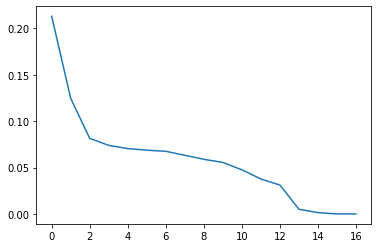

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np

X = scale(pd.concat([T_train,z_train],axis=1))

pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

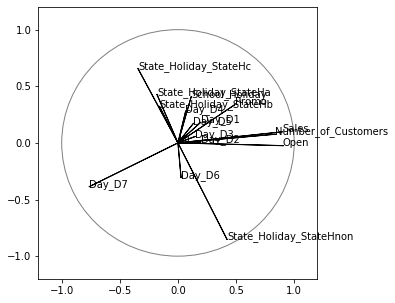

In [94]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, pd.concat([T_train,z_train],axis=1).columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

On peut voir que quelquesoit la période de vacances a, b ou c, la direction des variables dans le plan principal est la même donc on la regroupe sous un boolean. De même, la variable ID ne represente aucune variance.

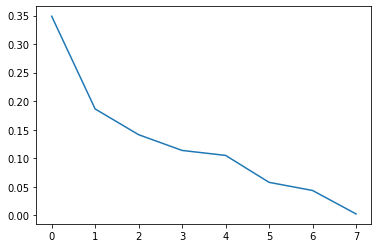

In [96]:
T_train = T_train[["Day_D1","Day_D6","Day_D7","Open","Promo","State_Holiday_StateHnon","School_Holiday"]]
#z_train ne change pas
X = scale(pd.concat([T_train,z_train],axis=1))

#pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

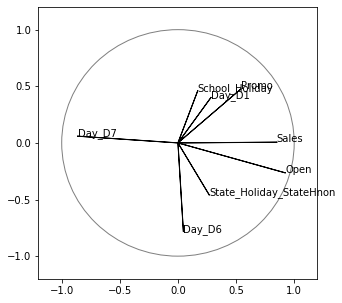

In [97]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, pd.concat([T_train,z_train],axis=1).columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Cela a permis également de mieux représenter la variable School_Holiday.
On regarde maintenant si on peut encore regrouper nos points selon 2 groupes, représentés dans le plan principal

### AFD

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
method = LinearDiscriminantAnalysis()
lda=method.fit(X,z_train)

/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
X

array([[-5.00989638e-01,  4.52291117e-01,  1.27322367e+00,
         1.77863148e-01, -4.66208002e-01,  3.93808563e-01],
       [-1.00184633e+00,  4.52291117e-01,  1.27322367e+00,
         1.77863148e-01,  2.14496533e+00,  3.33309046e-01],
       [-1.32943726e-04,  4.52291117e-01,  1.27322367e+00,
         1.77863148e-01, -4.66208002e-01, -3.14529138e-01],
       ...,
       [ 1.00158044e+00,  4.52291117e-01, -7.85407957e-01,
         1.77863148e-01, -4.66208002e-01,  1.21163271e-02],
       [-1.50270303e+00,  4.52291117e-01,  1.27322367e+00,
         1.77863148e-01,  2.14496533e+00,  5.73749189e-01],
       [-1.50270303e+00,  4.52291117e-01,  1.27322367e+00,
         1.77863148e-01, -4.66208002e-01,  2.04780027e-01]])

In [49]:
Clda=lda.transform(X)
plt.figure(figsize=(10,6))
for i, j, nom in zip(Clda[:,0],Clda[:,1], Y):
    plt.scatter(i, j, color=nom)
plt.axis((-8,7,-4,6))  
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 720x432 with 0 Axes>

In [18]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=2)
clust.fit(X)
classe=clust.labels_

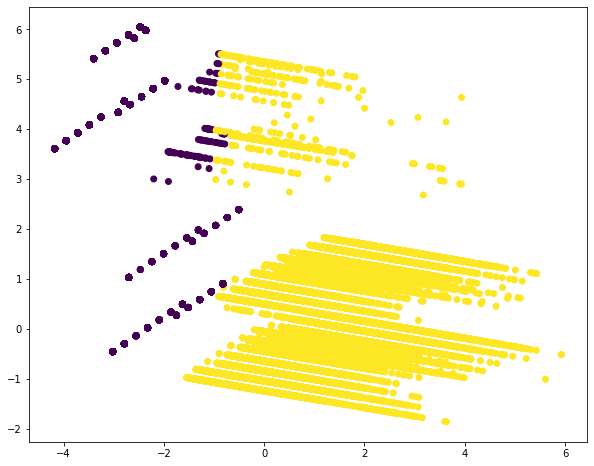

In [19]:
## Repésentation des individus dans les coordonnées de l'acp.
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(T_train,z_train,test_size=2/7,random_state=11)

# <FONT COLOR="Red">Deuxième partie: Prévision</font>

## 3 *K* plus proches voisins
Les images des caractères sont codées par des variables  quantitatives. Le problème de reconnaissance de forme ou de discrimination est adapté à l'algorithme des  [$k$-plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf). Le paramètre à optimiser pour contrôler la complexité du modèle est le nombre de voisin `n_neighbors`. Les autres options sont décrites dans la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)
digit_knn=knn.fit(X_train_2, y_train_2) 
# Estimation de l'erreur de prévision
# sur l'échantillon test
1-digit_knn.score(X_test_2,y_test_2)

/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8301186578975825

Optimisation du paramètre de complexité du modèle par validation croisée en cherchant l'erreur minimale sur une grille de valeurs du paramètre avec `cv=5`-*fold cross validation* et `n_jobs=-1` pour une exécution en parallèle utilisant tous les processeurs sauf 1. Attention, comme la validation croisée est aléatoire, deux exécutions successives ne donnent pas le même résultat.

In [15]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
param=[{"n_neighbors":list(range(1,15))}]
knn= GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)
digit_knnOpt=knn.fit(X_train_2, y_train_2)
# paramètre optimal
digit_knnOpt.best_params_["n_neighbors"]

/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


14

Le modèle `digit_knnOpt` est déjà estimé avec la valeur "optimale" du paramètre.

In [18]:
# Estimation de l'erreur de prévision sur l'échantillon test
1-digit_knnOpt.score(X_test_2,y_test_2)

0.8301186578975825

In [41]:
# Prévision
y_chap = digit_knnOpt.predict(X_test_2)
# matrice de confusion
#table=pd.crosstab(y_test_2,y_chap)
#print(table)
#plt.matshow(table)
#plt.title("Matrice de Confusion")
#plt.colorbar()
#plt.show()

In [44]:
y_test_2_tolist = y_test_2.values.tolist()

In [46]:
a = np.array(y_test_2_tolist) # your x
b = np.array(y_chap) # your y
mse = 0
for i in range(len(a)):
    mse+= (a[i]-b[i])**2/len(a)

mse

array([4497487.69783059])

## 4 Arbre de décision
### 4.1 Implémentation
Les [arbres binaires de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf) (CART: *classification and regression trees*) s'appliquent à tous types de variables. Les options de l'algorithme sont décrites dans la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). La complexité du modèle est gérée par deux paramètres : `max_depth`, qui détermine le nombre max de feuilles dans l'arbre, et le nombre minimales `min_samples_split` d'observations requises pour rechercher une dichotomie. 

**Attention**: Même s'il s'agit d'une implémentation proche de celle originale proposée par Breiman et al. (1984) il n'existe pas (encore?) comme dans R (package `rpart`) un paramètre de pénalisation de la déviance du modèle par sa complexité (nombre de feuilles) afin de construire une séquence d'arbres emboîtés dans la perspective d'un élagage (*pruning*) optimal par validation croisée. La fonction générique de $k$-*fold cross validation* `GridSearchCV` est utilisée pour optimiser le paramètre de profondeur mais sans beaucoup de précision dans l'élagage car ce dernier élimine tout un niveau et pas les seules feuilles inutiles à la qualité de la prévision.

En revanche, l'implémentation anticipe sur celles des [méthodes d'agrégation de modèles](http://wikistat.fr/pdf/st-m-app-agreg.pdf) en intégrant les paramètres (nombre de variables tirées, importance...) qui leurs sont spécifiques. D'autre part, la représentation graphique d'un arbre n'est pas incluse et nécessite l'implémentation d'un autre logiciel libre: [Graphviz](http://www.graphviz.org/). 

Tout ceci souligne encore les objectifs de développement de cette librairie: temps de calcul et prévision brute au détriment d'une recherche d'interprétation. Dans certains exemples éventuellement pas trop compliqués, un arbre élagué de façon optimal peut en effet prévoir à peine moins bien (différence non significative) qu'une agrégation de modèles (forêt aléatoire ou **boosting**) et apporter un éclairage nettement plus pertinent qu'un algorithme de type "boîte noire". 

## 4.2 Données "Magasins"
Estimation de l'arbre complet.

In [47]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
tree=DecisionTreeClassifier()
digit_tree=tree.fit(X_train_2, y_train_2) 
# Estimation de l'erreur de prévision
#1-digit_tree.score(T_test,z_test)
#y_chap = digit_tree.predict(T_test)

#fichier = open("/home/odemoly/Documents/Certificat_BD/Second_Projet/submission/store_test.predict", "w")
#for i in range(len(z_chap)):
    
#    fichier.write(z_chap[i]+"\n")
    
#fichier.close()



MemoryError: could not allocate 2540044288 bytes

Optimisation du paramètre de complexité du modèle par validation croisée en cherchant l'erreur minimale sur une grille de valeurs du paramètre avec `cv=5`-*fold cross validation* et `n_jobs=-1` pour une exécution en parallèle utilisant tous les processeurs sauf 1. Attention, comme la validation croisée est aléatoire et un arbre un modèle instable, deux exécutions successives ne donnent pas nécessairement le même résultat.

In [ ]:
param=[{"max_depth":list(range(2,10))}]
titan_tree= GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
titan_opt=titan_tree.fit(T_train, z_train)
# paramètre optimal
titan_opt.best_params_

La valeur "optimale" du paramètre reste trop importante pour la lisibilité de l'arbre. Une valeur plus faible est utilisée.

In [ ]:
tree=DecisionTreeClassifier(max_depth=3)
titan_tree=tree.fit(T_train, z_train)
# Estimation de l'erreur de prévision
# sur l'échantillon test
1-titan_tree.score(T_test,z_test)

Noter l'amélioration de l'erreur.

In [ ]:
# prévision de l'échantillon test
z_chap = titan_tree.predict(T_test)
# matrice de confusion
table=pd.crosstab(z_test,z_chap)
print(table)

Tracer l'arbre avec le logiciel Graphviz.

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 
export_graphviz(titan_tree, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("titan_tree.png")  

L'arbre est généré dans un fichier image à visualiser pour se rende compte qu'il est plutôt mal élagué et pas directement interprétable sans les noms en clair des variables et modalités.

In [ ]:
from IPython.display import Image
Image(filename='titan_tree.png')

## 5 Forêts aléatoires
L'algorithme d'agrégation de modèles le plus utilisé est celui des [forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf) (random forest) de Breiman (2001) ce qui ne signifie pas qu'il conduit toujours à la meilleure prévision. Voir la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) pour la signification de tous les paramètres.

Plus que le nombre d'arbres `n_estimators`, le paramètre à optimiser est le nombre de variables tirées aléatoirement pour la recherche de la division optimale d'un noeud: `max_features`. Par défaut, il prend la valeur $\frac{p}{3}$ en  régression et $\sqrt{p}$ en discrimination.
### 5.1 Données "Magasins"

In [13]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=50, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage et erreur out-of-bag
forest = forest.fit(X_train_2[0:1000],y_train_2[0:1000])
print(1-forest.oob_score_)

/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.829


In [14]:
# erreur de prévision sur le test
1-forest.score(X_test_2,y_test_2)

MemoryError: Unable to allocate 1.19 GiB for an array with shape (203442, 787) and data type float64

L'optimisation du paramètre `max_features` peut être réalisée en minimisant l'erreur de prévision *out-of-bag*. Ce n'est pas prévu, il est aussi possible comme précédemment de minimiser l'erreur par validation croisée.

In [18]:
from sklearn.model_selection import GridSearchCV
param=[{"max_features":list(range(4,64,4))}]
digit_rf= GridSearchCV(RandomForestClassifier(n_estimators=50),param,cv=5,n_jobs=-1)
digit_rfOpt=digit_rf.fit(X_train_2[0:1000], y_train_2[0:1000])
# paramètre optimal
digit_rfOpt.best_params_

OSError: [Errno 12] Cannot allocate memory

Comme pour les autres méthodes, l'objet `GridSearchCV` ne propose pas tous les attributs et donc pas d'erreur *out-of-bag* ou d'importance des variables. Voir le tutoriel sur la [prévision du pic d'ozone](https://github.com/wikistat/Apprentissage/tree/master/Pic-ozone) pour plus de détails.

In [16]:
# erreur de prévision sur le test
1-digit_rfOpt.score(X_test_2,y_test_2)

NameError: name 'digit_rfOpt' is not defined

In [ ]:
# prévision
y_chap = digit_rfOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_test,y_chap)
print(table)
plt.matshow(table)
plt.title("Matrice de Confusion")
plt.colorbar()
plt.show()

## 6 Fonction *pipeline*
Pour enchaîner et brancher (*plugin*) plusieurs traitements, généralement des transformations suivies d'une modélisation. Utiliser les fonctionnalités de cette section sans modération afin d'optimiser la structure et l'efficacité (parallélisation) de codes complexes. 

### 6.1 Familles de transformations (*transformers*)
Classification ou régression sont souvent la dernière étape d'un procédé long et complexe. Dans la "vraie vie", les données ont besoin d'être extraites, sélectionnées, nettoyées, standardisées, complétées... (*data munging*) avant d'alimenter un algorithme d'apprentissage. Pour structurer le code, *Sciki-learn* propose d'utiliser le principe d'une API (*application programming interface*) nommée *transformer*. 

Ces fonctionnalités sont illustrées sur les mêmes données de reconnaissance de caractères. 

In [ ]:
# Rechargement des données
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Plot
sample_id = 42
plt.imshow(X[sample_id].reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.title("y = %d" % y[sample_id])
plt.show()

#### Normalisations, réductions

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X)  
print("Moyenne avant centrage et réduction =", np.mean(X_train))
print("Moyenne après centrage et réduction =", np.mean(Xt_train))
# See also Binarizer, MinMaxScaler, Normalizer, ...

In [ ]:
# Raccourci: Xt = tf.fit_transform(X)
tf.fit_transform(X)

In [ ]:
# NB. La standardisation préalable est indispensable pour certains algorithmes
# notamment les SVM
from sklearn.svm import SVC
clf = SVC()
# Calcul des scores (bien classés)
print("Sans standardisation =", clf.fit(X_train, y_train).score(X_test, y_test))
print("Avec standardisation =", clf.fit(tf.transform(X_train), y_train).score(tf.transform(X_test), y_test))

#### Sélection de variables par élimination pas à pas
La proicédure `RFE` (*récursive feature selection*) supprime une à une les variables les moins significatives ou moins importantes au sens du critère du modèle utilisé; dans cet exemple, il s'agit des forêts aléatoires.

In [ ]:
# Sélection de variables par élémination pas à pas
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
tf = RFE(RandomForestClassifier(), n_features_to_select=10, verbose=1)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# Variables (pixels) sélectionnées
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

#### Décomposition, factorisation, réduction de dimension
Possibilité, par exemple, de récupérer les *q* premières composantes principales de l'ACP comme résultat d'une transformation.

In [ ]:
# par ACP ou SVD
from sklearn.decomposition import PCA
tf = PCA(n_components=2)
Xt_train = tf.fit_transform(X_train)

####  Fonction  de transformation définie par l'utilisateur
Une fonction de transformation ou *transformer* est définie et s'applique à un jeu de données avec la syntaxe ci-dessous.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def increment(X):
    return X + 1
tf = FunctionTransformer(func=increment)
Xt = tf.fit_transform(X)
print(X[0])
print(Xt[0])

### 6.4 *Pipelines*

Des transformations sont chaînées en une séquence constituant un *pipeline*.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
#tf = RFE(RandomForestClassifier(), n_features_to_select=10)
# La succession de deux transformeurs constituent un transformeur
tf = make_pipeline(StandardScaler(), RFE(RandomForestClassifier(),n_features_to_select=10))
tf.fit(X_train, y_train)

In [ ]:
Xt_train = tf.transform(X_train)
print("Mean =", np.mean(Xt_train))
print("Shape =", Xt_train.shape)

Une chaîne de transformations suivi d'un classifieur construisent un nouveau classifieur

In [ ]:
clf = make_pipeline(StandardScaler(), 
                    RFE(RandomForestClassifier(), n_features_to_select=10), 
                    RandomForestClassifier())
clf.fit(X_train, y_train)
print(clf.predict_proba(X_test)[:5])

In [ ]:
# L'hyperparamètre est accessible
print("n_features =", clf.get_params()["rfe__estimator__n_estimators"])

L'optimisation des paramètres par validation croisée est obtenue avec la même fonction mais peut prendre  du temps si plusieurs paramètres sont cocernés! Le pipeline construit à titre illustratif  n'est certainement pas optimal.

In [ ]:
grid = GridSearchCV(clf, param_grid={"rfe__estimator__n_estimators": [5, 10],
                    "randomforestclassifier__max_features": [0.1, 0.25, 0.5]})
grid.fit(X_train, y_train)
print("Valeurs optimales =", grid.best_params_)

### 6.5 Union de caractéristiques

Des transformations sont appliquées en parallèle pour réunir en un seul ensemble des transformations des données.

In [ ]:
from sklearn.pipeline import make_union
from sklearn.decomposition import PCA, FastICA
tf = make_union(PCA(n_components=10), FastICA(n_components=10))
Xt_train = tf.fit_transform(X_train)
print("Shape =", Xt_train.shape)

### 6.6 Compositions emboîtées

Comme des  pipelines and des unions sont eux-mêmes des estimateurs, ils peuvent être composés dans une structure emboîtée pour construire des combinaisons complexes de modèles comme ceux remportant les concours de type [*kaggle](https://www.kaggle.com/).

Les données initiales sont unies aux composantes de l'ACP, puis les variables les plus importantes au sens des forêts aléatoires sont sélectionnées avant de servir à l'apprentissage d'un réseau de neurones. Ce n'est sûrement pas une stratégie optimale !

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

clf = make_pipeline(
    # Build features
    make_union(
        FunctionTransformer(func=lambda X: X), PCA(),), 
    # Select the best features
    RFE(RandomForestClassifier(), n_features_to_select=10),
    # Train
    MLPClassifier(max_iter=500)
)

clf.fit(X_train, y_train)

Effectivement la combinaison n'est pas optimale:

In [ ]:
# erreur de test
1-clf.score(X_test,y_test)